In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1e-06, momentum=0.5):
    diff = 0.0
    vector = start
    for _ in range(n_iter):
        # momentum_val = momentum * diff # diff is from previous time step bc it hasn't been update yet
        diff = - learn_rate * gradient(vector)# + momentum_val
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
        yield vector
    return vector


In [3]:
# function : v^2

In [4]:
points = [point for point in gradient_descent(gradient=lambda v: 2*v, start=10.0, n_iter=50, learn_rate=0.02)];

In [5]:
len(points)

50

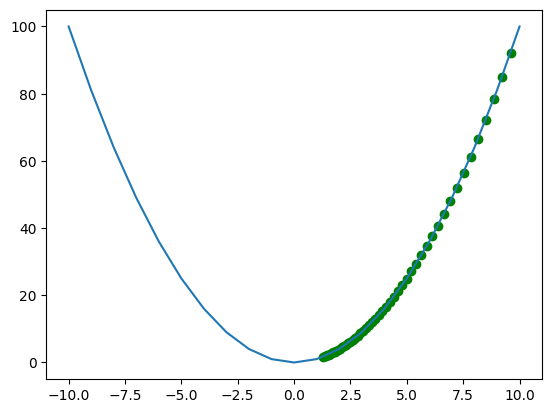

In [6]:
plt.scatter(points, np.array(points)**2, c="green")
plt.plot([i for i in np.arange(-10, 11)], [i**2 for i in np.arange(-10, 11)])

In [7]:
gradient_descent(
    gradient=lambda v: 4 * v**3 - 10 * v - 3, start=0,
    learn_rate=0.5
)

<generator object gradient_descent at 0x7f6c2798e890>

In [8]:
points = [point for point in gradient_descent(gradient=lambda v: 4 * v**3 - 10 * v - 3, start=-3.0, n_iter=len(np.linspace(-3, 3))*60, learn_rate=0.01)];

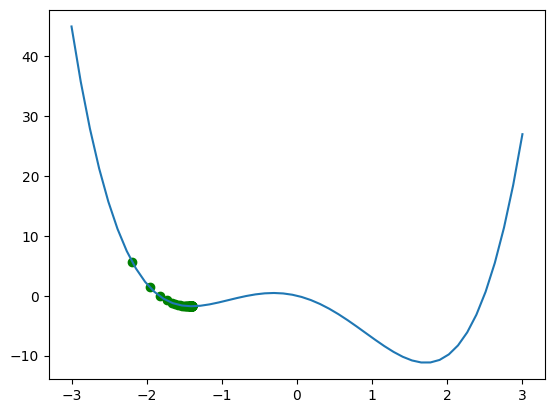

In [9]:
plt.scatter(points, np.array(points)**4 - 5*np.array(points)**2 - 3*np.array(points), c="green")
plt.plot([i for i in np.linspace(-3, 3)], [i**4 - 5*i**2 - 3*i for i in np.linspace(-3, 3)])

In [10]:
gradient_descent(
    gradient=lambda v: np.array([2 * v[0], 4 * v[1]**3]),
    start=np.array([1.0, 1.0]), learn_rate=0.2, tolerance=1e-08
)

<generator object gradient_descent at 0x7f6c255f2f90>

In [11]:
# psuedo code - gradient descent with momentum
# set learning rate (ie step size)
# calculate gradient
#  - calculate gradients with respect to each parameter
# multiply the learning rate by the negative gradient to get the size of the change
# multiple momentum rate by change from previous step (ie change_x(t-1))
# add momentum to current change value
# add change to vector of current location

In [57]:
def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean()  # .mean() is a method of np.ndarray

In [58]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])
# sgd(ssr_gradient, x, y)

In [59]:
def create_mini_batches(x, y, batch_size, shuffle=False):
    splits = x.shape[0] // batch_size
    remainder = x.shape[0] % splits
    if remainder != 0:
        x = x[:-remainder]
        y = y[:-remainder]
        
    x_batches = np.split(x, splits)
    y_batches = np.split(y, splits)

    return np.array(x_batches), np.array(y_batches)

In [70]:
def stochastic_gradient_descent(
    gradient, x, y, initialization, learn_rate=0.1, batch_size=1, epochs=10,
    dtype="float64", random_state=None, tolerance=1e-06
):
    # check that gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be a callable")
        
    # set up data type for arrays
    dtype_ = np.dtype(dtype)
    
    # cast data to numpy arrays
    X, Y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_samples = x.shape[0]
    if n_samples != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
        
    # intialize weights
    state_vector = np.array(initialization, dtype=dtype_)
    
    # set and validate learn rate
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")
        
    # Setting up and checking the size of minibatches
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_samples:
        raise ValueError(
            "'batch_size' must be greater than zero and less than "
            "or equal to the number of observations"
        )
    

    for epoch in range(epochs):
        x_batched, y_batched = create_mini_batches(X, Y, batch_size=batch_size)
        for x_batch, y_batch in zip(x_batched, y_batched):
            grad = np.array(gradient(x_batch, y_batch, state_vector))
            diff = -learn_rate * grad
            if np.all(np.abs(diff) <= tolerance):
                return
            state_vector += diff
    return state_vector

In [89]:
vector = stochastic_gradient_descent(ssr_gradient, x, y, [0.5,0.5], batch_size=1, epochs=100000)
print(vector)

/tmp/ipykernel_7068/2943896419.py:3: RuntimeWarning: overflow encountered in multiply
  return res.mean(), (res * x).mean()  # .mean() is a method of np.ndarray
/tmp/ipykernel_7068/1615552440.py:42: RuntimeWarning: invalid value encountered in add
  state_vector += diff


[nan nan]


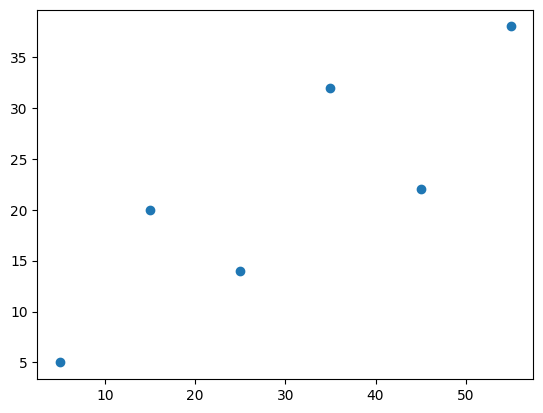

In [88]:
plt.scatter(x,y)
plt.scatter(range(50), [vector[0] + vector[1]*i for i in range(50)])

In [90]:
def sgd(
    gradient, x, y, n_vars=None, start=None, learn_rate=0.1,
    decay_rate=0.0, batch_size=1, n_iter=50, tolerance=1e-06,
    dtype="float64", random_state=None
):
    # Checking if the gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be callable")

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)

    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Initializing the random number generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)

    # Initializing the values of the variables
    vector = (
        rng.normal(size=int(n_vars)).astype(dtype_)
        if start is None else
        np.array(start, dtype=dtype_)
    )

    # Setting up and checking the learning rate
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")

    # Setting up and checking the decay rate
    decay_rate = np.array(decay_rate, dtype=dtype_)
    if np.any(decay_rate < 0) or np.any(decay_rate > 1):
        raise ValueError("'decay_rate' must be between zero and one")

    # Setting up and checking the size of minibatches
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_obs:
        raise ValueError(
            "'batch_size' must be greater than zero and less than "
            "or equal to the number of observations"
        )

    # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Setting the difference to zero for the first iteration
    diff = 0

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Shuffle x and y
        rng.shuffle(xy)

        # Performing minibatch moves
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]

            # Recalculating the difference
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = decay_rate * diff - learn_rate * grad

            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the values of the variables
            vector += diff

    return vector if vector.shape else vector.item()

In [91]:
vector = sgd(
    ssr_gradient, x, y, start=[0.5, 0.5], learn_rate=0.0008,
    batch_size=3, n_iter=100_000, random_state=0)

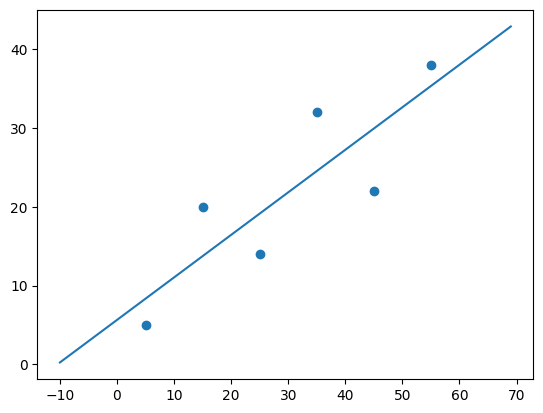

In [94]:
plt.scatter(x,y)
plt.plot(np.arange(-10, 70), [vector[0] + vector[1]*i for i in np.arange(-10, 70)])